In [4]:
import cv2
import numpy as np
import pytesseract as ocr
from PIL import Image
import matplotlib.pyplot as plt
from copy import deepcopy, copy
import os
import time

In [22]:
class Plate:
    
    """ Class of Plate Licenses 
    """
    def __init__(self, image):
        self.original_image = image
        self.plate_located_image = deepcopy(image)
        self.plate_image = None
        self.gray_plate_image = None
        self.gray_image = None
        self.roi = []
        self.plate_number = ""
        print("A new license plate has been created \n")
        
    def plateSearch(self):
        self.findContour()
        self.cropPlate()
        if(self.plate_image is not None):
            self.readPlateNumber()
        self.showResults()
    
    """ Search for a contour that assembles the image of a license plate 
    """
    def findContour(self):
        self.gray_image = cv2.cvtColor(deepcopy(self.original_image), cv2.COLOR_BGR2GRAY)
        self.gray_image = cv2.medianBlur(self.gray_image, 5)
        self.gray_image = cv2.adaptiveThreshold(self.gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 43, 2)
        contours, hierarchy = cv2.findContours(self.gray_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        
        w,h,x,y = 0,0,0,0
        
        print("%s potential contours have been found", str(len(contours)))
        
        for cnt in contours:
            area = cv2.contourArea(cnt)
            
            # rough range of areas of a license plate - this may vary from image to image
            if (area > 30000 and area < 100000): #6000 e 4000
                [x,y,w,h] = cv2.boundingRect(cnt)
            
            # rough dimensions of a license plate - this may vary from imagem to image
            if(w > 500 and w < 800 and h > 100 and h < 200):
                self.roi.append([x,y,w,h])
                cv2.rectangle(self.plate_located_image,(x,y),(x+w,y+h),(0,255,0),10)
        print("%s potential license plates" % str(len(self.roi)))
        return True
    
    """ If the contour of a license plate has been found, therefore a new image is createad
    """
    def cropPlate(self):
        if len(self.roi) > 1:
            [x,y,w,h] = self.roi[0]
            self.plate_image = self.original_image[y:y+h,x:x+w]
            self.plate_image_char = deepcopy(self.plate_image)
        return True
    
    """ Receive the new license plate image and reads its chracters 
    """
    def readPlateNumber(self):
        self.gray_plate_image = cv2.cvtColor(deepcopy(self.plate_image), cv2.COLOR_BGR2GRAY)
        self.gray_plate_image = cv2.GaussianBlur(self.gray_plate_image, (1,1), 0) 
        self.gray_plate_image = cv2.adaptiveThreshold(self.gray_plate_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 2)
        self.plate_number = ocr.image_to_string(self.gray_plate_image, lang = 'por')
        return True
    
    def plot(self, figure, subplot, image, title):
        figure.subplot(subplot)
        figure.imshow(image)
        figure.xlabel(title)
        figure.xticks([])
        figure.yticks([])
        return True
    
    """ Show the results through matplotlib plots
    """
    def showResults(self):
        plt.figure(self.plate_number)
        self.plot(plt, 321, self.original_image, "Original Image")
        self.plot(plt, 322, self.gray_image, "Threshold image")
        self.plot(plt, 323, self.plate_located_image, "Plate Located")
        
        if self.plate_image is not None:
            self.plot(plt, 324, self.plate_image, "License Plate")
            self.plot(plt,325, self.gray_plate_image, "Threshold Placa de Carro")
            plt.subplot(326)
            plt.text(0,0,self.plate_number, fontsize=15)
            plt.xticks([])
            plt.yticks([])
        
        plt.tight_layout()
        plt.show()
        return True

In [23]:
""" Load all the images from the folder '/images/cars'
"""
def loadImages(folder):
    plates_array = []
    for image_filename in os.listdir(folder):
        print("Carregando a imagem %s..." % image_filename)
        image_file = cv2.imread(folder + image_filename)
        plate_object = Plate(image_file)
        plates_array.append(plate_object)
    return plates_array

Carregando a imagem BAG-7751.jpg...
A new license plate has been created 

Carregando a imagem AXX-1773.jpg...
A new license plate has been created 

Carregando a imagem BAG-7751 (3).jpg...
A new license plate has been created 

%s potential contours have been found 1055
0 potential license plates


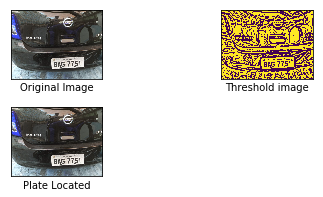

%s potential contours have been found 259
0 potential license plates


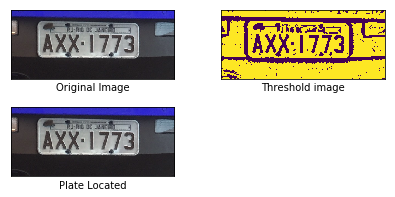

%s potential contours have been found 927
279 potential license plates


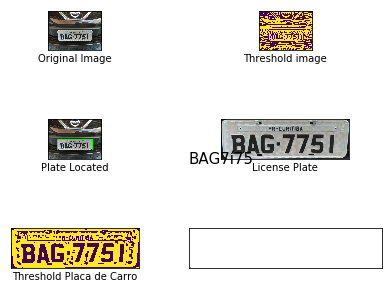

LPR Algorithm finalized


In [24]:
folder = "images/cars/"
plates_array = loadImages(folder)
for plate in plates_array:
    plate.plateSearch()
print("LPR Algorithm finalized")